# Exploratory data analysis of the Titanic dataset

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.husl_palette(s=1)
sns.set(style='whitegrid', palette=palette, context='talk')

In [26]:
df = pd.read_csv('train.csv')

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [35]:
#train.groupby('Pclass')
passengers = df.groupby(['Pclass', 'Sex'])[['PassengerId']].count()
passengers

PassengerId
Pclass Sex                
1      female           94
       male            122
2      female           76
       male            108
3      female          144
       male            347

Text(0.5, 1.0, 'Seaborn.countplot()')

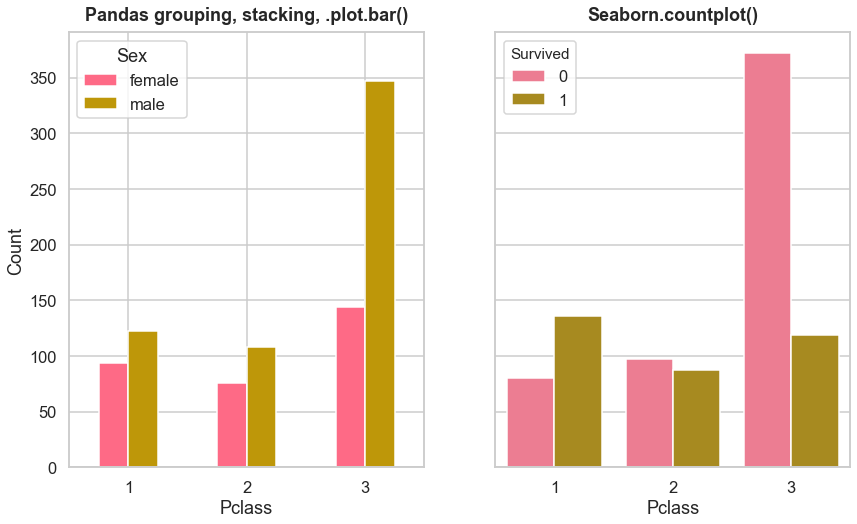

In [89]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(14,8))

# Pandas grouping, stacking, and .plot.bar()
ax1 = axs[0]
df.groupby(['Pclass', 'Sex'])['PassengerId'].count().unstack(1).plot.bar(rot=0, ax = ax1)

# Seaborn.countplot()
ax2 = axs[1]
sns.countplot(x='Pclass', hue='Survived', data=df, ax=ax2)                                            


#Labels
ax1.set_title('Pandas grouping, stacking, .plot.bar()', weight='bold', pad=12)
ax1.set_ylabel('Count')
ax2.set_title('Seaborn.countplot()', weight='bold', pad=12)

### Add additional information with separation in two graphs with seaborn.catplot()

<Figure size 864x432 with 0 Axes>

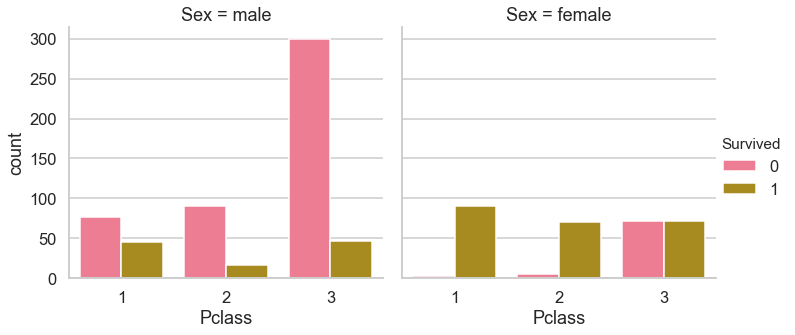

In [54]:
g = plt.figure(figsize=(12,6))
g = sns.catplot(x="Pclass", hue="Survived", col="Sex",data=train, kind="count")

### Histograms with seaborn.distplot()

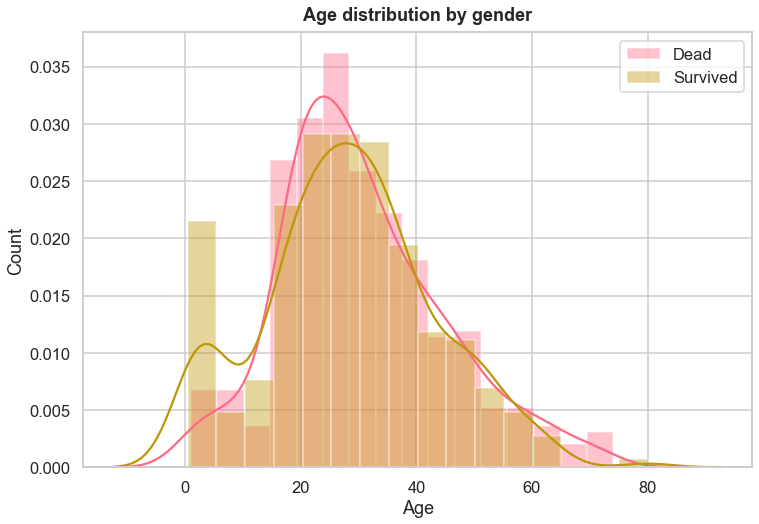

In [55]:
plt.figure(figsize=(12,8))

ax = sns.distplot(train[train['Survived'] == 0]['Age'], label="Dead")
sns.distplot(train[train['Survived'] == 1]['Age'], label="Survived")

ax.set_title('Age distribution by gender', weight='bold', pad=12)
ax.set_ylabel('Count')
plt.legend()


### Count how many people per ticket and calculate fare per passenger

In [80]:
ppticket = df.groupby('Ticket')['PassengerId'].count().to_dict() # number of passengers for each ticket as dict
df['pass_ticket'] = df['Ticket'].replace(ppticket)
df['fare_per_pass'] = df['Fare'] / df['pass_ticket'] # fare per passenger

<Figure size 864x576 with 0 Axes>

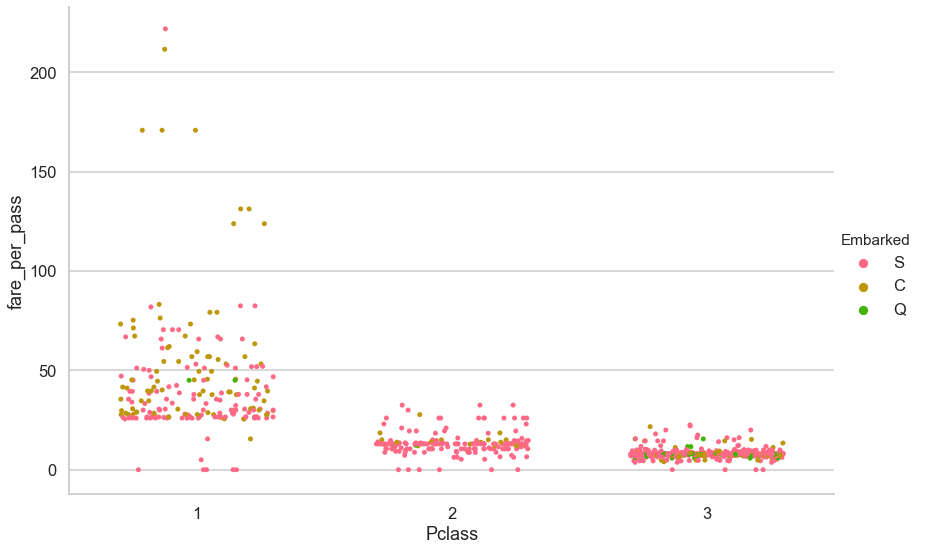

In [81]:
plt.figure(figsize=(12,8))
sns.catplot(x='Pclass', y='fare_per_pass', hue='Embarked', kind='strip', data=train, jitter=0.3, height=8, aspect=1.5)



(0, 1)

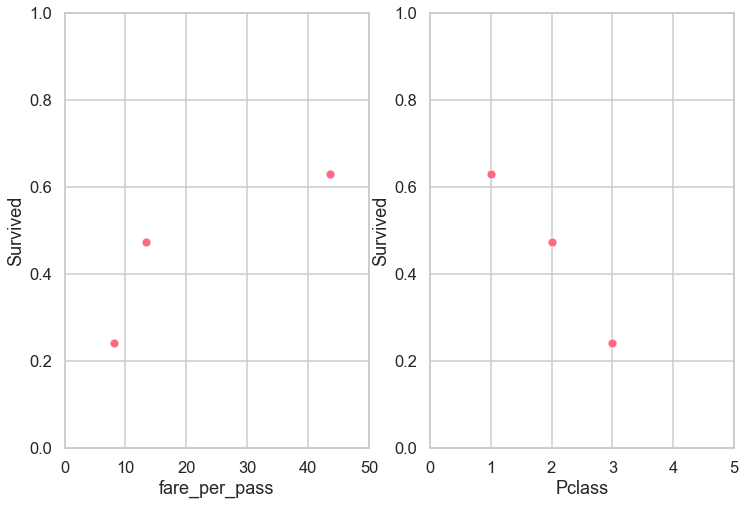

In [82]:
plt.figure(figsize=(12,8))

# Survival chance vs Fare per passenger
ax1 = plt.subplot(1,2,1)
fare_survive = train.groupby('Pclass')[['Pclass', 'fare_per_pass', 'Survived']].mean()
ax1 = sns.scatterplot(x='fare_per_pass', y='Survived', data=fare_survive)
plt.xlim(0, 50)
plt.ylim(0, 1) 

# Survival chance vs Pclass
ax2 = plt.subplot(1,2,2)
ax2 = sns.scatterplot(x='Pclass', y='Survived', data=fare_survive)
plt.xlim(0, 5)
plt.ylim(0, 1) 

## -> Guys, always compare prices and and make sure to book at least 2nd class for transatlantic boat trips in the 1910's.

## Does group size matter?

Text(0.5, 0, 'Passengers per Ticket')

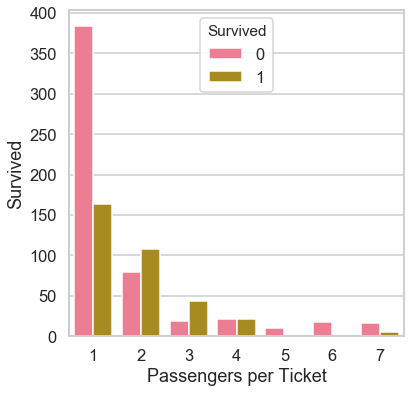

In [84]:
ax = plt.figure(figsize=(6,6))
ax = sns.countplot(x='pass_ticket', hue='Survived', data=train)

ax.set_ylabel('Survived')
ax.set_xlabel('Passengers per Ticket')

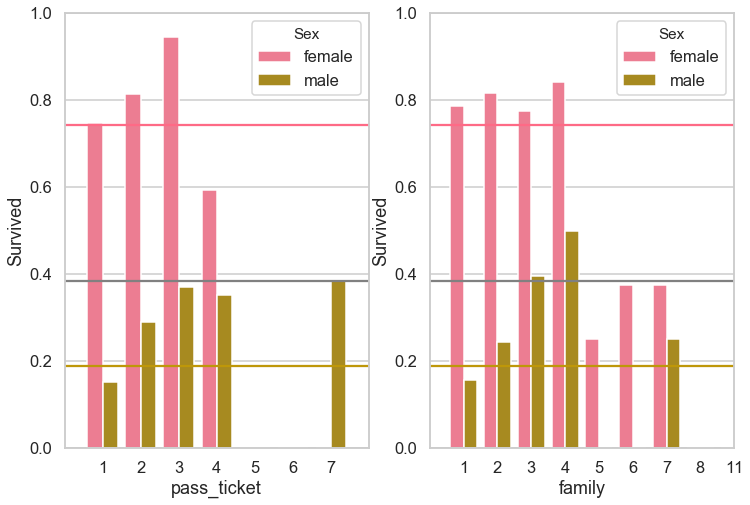

In [87]:
group_plot=df.groupby(['pass_ticket', 'Sex'])['Survived'].mean().reset_index()
family_plot = df.groupby(['family', 'Sex'])['Survived'].mean().reset_index()

plt.figure(figsize=(12,8))

ax1 = plt.subplot(1,2,1)
ax1 = sns.barplot(x='pass_ticket', y='Survived', hue='Sex', data=group_plot)
plt.xlim(-1,7)
plt.ylim(0,1)
plt.hlines(y=train.groupby('Sex')['Survived'].mean()['female'], xmin=-1, xmax=7, color=palette[0])
plt.hlines(y=train.groupby('Sex')['Survived'].mean()['male'], xmin=-1, xmax=7, color=palette[1])
plt.hlines(y=train['Survived'].mean(), xmin=-1, xmax=7, color='grey')


ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(x='family', y='Survived', hue='Sex', data=family_plot)
plt.xlim(-1,8)
plt.ylim(0,1)
plt.hlines(y=train.groupby('Sex')['Survived'].mean()['female'], xmin=-1, xmax=8, color=palette[0])
plt.hlines(y=train.groupby('Sex')['Survived'].mean()['male'], xmin=-1, xmax=8, color=palette[1])
plt.hlines(y=train['Survived'].mean(), xmin=-1, xmax=8, color='grey')

## How about family?

In [72]:
df['family'] = df['SibSp'] + df['Parch'] + 1

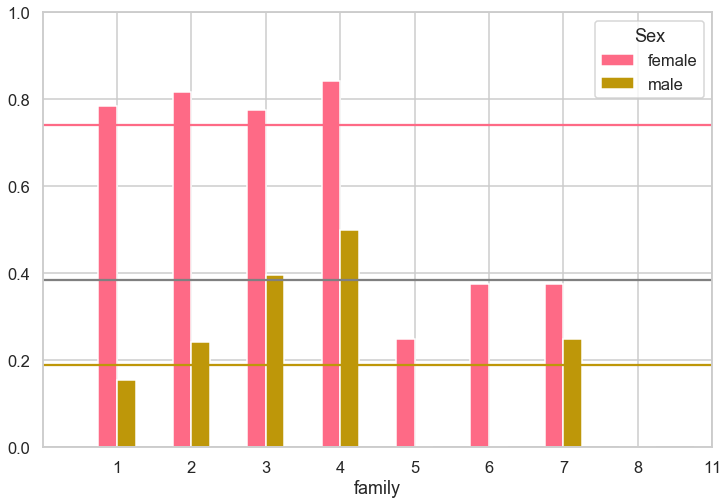

In [73]:
df.groupby(['family', 'Sex'])['Survived'].mean().unstack(1).plot.bar(figsize=(12,8), rot=0)
plt.xlim(-1,8)
plt.ylim(0,1)
plt.hlines(y=train.groupby('Sex')['Survived'].mean()['female'], xmin=-1, xmax=8, color=palette[0])
plt.hlines(y=train.groupby('Sex')['Survived'].mean()['male'], xmin=-1, xmax=8, color=palette[1])
plt.hlines(y=train['Survived'].mean(), xmin=-1, xmax=8, color='grey')
#train.head()xmin, xmax